In [8]:
import time
import os
from queue import Queue
from operator import itemgetter
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from dotenv import load_dotenv
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.transpiler import PassManager
from qiskit import transpile

load_dotenv()

maze = [
    [1, 0, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 0, 1, 1, 0, 1, 1],
    [1, 0, 1, 1, 1, 0, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 0, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 1, 1, 1, 1, 1],
]

maze = np.array(maze)

         
q3_0: ─■─
       │ 
q3_1: ─■─
         
      ┌───┐┌───┐          ┌───┐┌───┐     
q3_0: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
      ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐
q3_1: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
      └───┘└───┘└───┘└───┘└───┘└───┘└───┘
      ┌───┐   
q3_0: ┤ H ├─■─
      ├───┤ │ 
q3_1: ┤ H ├─■─
      └───┘   
c2: 2/════════
              
      ┌───┐   ┌───┐┌───┐          ┌───┐┌───┐     
q3_0: ┤ H ├─■─┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
      ├───┤ │ ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐
q3_1: ┤ H ├─■─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
      └───┘   └───┘└───┘└───┘└───┘└───┘└───┘└───┘
c2: 2/═══════════════════════════════════════════
                                                 
      ┌───┐   ┌───┐┌───┐          ┌───┐┌───┐     ┌─┐   
q3_0: ┤ H ├─■─┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────┤M├───
      ├───┤ │ ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐└╥┘┌─┐
q3_1: ┤ H ├─■─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫─┤M├
      └───┘   └───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║ └╥┘
c2: 2

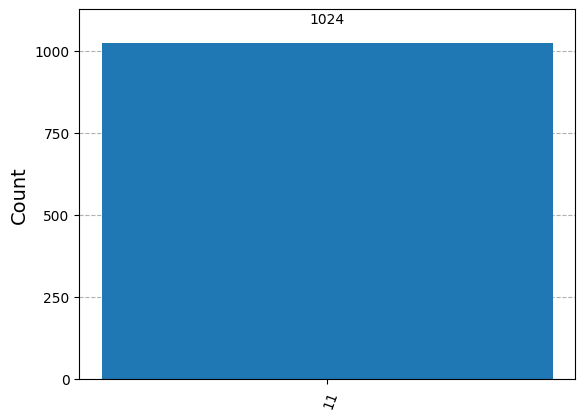

In [4]:
# Qiskit init
# if os.getenv("Qiskit_API_Token"):
#     print("API Token Successfully Loaded")
# else:
#     raise Exception(
#         "Qiskit API Token not found. Please verify it is correctly declared in your .env file."
#     )

# try:
#     print("Establishing connection...")
#     service = QiskitRuntimeService(
#         channel="ibm_quantum",
#         token=os.getenv("Qiskit_API_Token"),
#     )
#     print("Connection Established.")
# except Exception as e:
#     print(e)
# backend = service.backend(name="ibm_brisbane")
# print(backend.num_qubits)


# Grover's
def phase_oracle(circuit, register):
    circuit.cz(register[0], register[1])


def inversion_about_average(circuit, register):
    circuit.h(register)
    circuit.x(register)
    circuit.h(register[1])
    circuit.cx(register[0], register[1])
    circuit.h(register[1])
    circuit.x(register)
    circuit.h(register)


qr = QuantumRegister(2)
cr = ClassicalRegister(2)
oracle = QuantumCircuit(qr)
phase_oracle(oracle, qr)
print(oracle.draw())
qaverage = QuantumCircuit(qr)
inversion_about_average(qaverage, qr)
print(qaverage.draw())

grovercircuit = QuantumCircuit(qr, cr)
grovercircuit.h(qr)
phase_oracle(grovercircuit, qr)
print(grovercircuit.draw())
inversion_about_average(grovercircuit, qr)
print(grovercircuit.draw())
grovercircuit.measure(qr, cr)
print(grovercircuit.draw())

backend = AerSimulator()
job = backend.run(grovercircuit, shots=1024)
results = job.result()
answer = results.get_counts()
print(answer)
plot_histogram(answer)

In [10]:
service = QiskitRuntimeService(
    channel="ibm_quantum", token=os.getenv("Qiskit_API_Token")
)
backend = service.backend("ibm_brisbane")

new_circuit = transpile(grovercircuit, backend=backend)
job = backend.run(new_circuit, shots=1024)

/var/folders/t_/_kgrzhvx5p11fr3z490n_1zr0000gn/T/ipykernel_59628/2958624691.py:7: DeprecationWarning: backend.run() and related sessions methods are deprecated  as of qiskit-ibm-runtime 0.23 and will be removed no sooner than 6 months after the release date. More details can be found in the primitives migration guide https://docs.quantum.ibm.com/migration-guides/qiskit-runtime.
  job = backend.run(new_circuit, shots=1024)


{'00': 13, '10': 32, '11': 794, '01': 185}


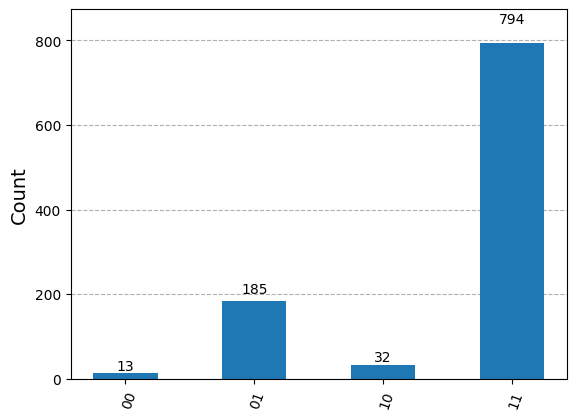

In [13]:
results = job.result()
answer = results.get_counts()
print(answer)
plot_histogram(answer)